In [223]:
import pickle
from collections import defaultdict
import numpy as np
from camera import take_picture
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models
import skimage.io as io
import os
import matplotlib.pyplot as plt

from camera import take_picture
face_dict = defaultdict(np.array)
face_count = defaultdict(np.array)
with open('database2.pkl', 'wb') as handle:
    pickle.dump(face_dict, handle)
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]

File already exists:
	c:\users\ghaem\desktop\programms\beaver\summer\dlib\dlibmodels\dlib_models\dlib_face_recognition_resnet_model_v1.dat
File already exists:
	c:\users\ghaem\desktop\programms\beaver\summer\dlib\dlibmodels\dlib_models\shape_predictor_68_face_landmarks.dat


In [264]:
with open('database.pkl', 'rb') as handle:
    face_dict = pickle.load(handle)

def LogPic(face_data, label):
    if not face_dict: 
        face_count[label] = 1
        face_dict[label] = face_data
    elif face_dict.get(label) is None:
        face_count[label] = 1
        face_dict[label] = face_data
    else:
        face_count[label] += 1
        face_dict[label] += face_data

def uploadimage(imgpath):
    pic = io.imread(imgpath)
    return pic

def makedescriptors (pic1):
    try:
        detections = list(face_detect(pic1))
        shape = shape_predictor(pic1, detections[0])
        descriptor1 = np.array(face_rec_model.compute_face_descriptor(pic1,shape))
    except:
        return None
    return descriptor1
person = "Casey"
for i,filename in enumerate(os.listdir('.')):
    if filename.endswith(".png"):
        x = uploadimage(filename)
        x = makedescriptors(x)
        if x is None:
            print(i)
            continue
        LogPic(x,person)
        continue
    else:
        continue
face_dict[person] = face_dict[person]/face_count[person]
print("Start pickling my dudes")
with open('database.pkl', 'wb') as handle:
    pickle.dump(face_dict, handle)

Start pickling my dudes


In [258]:
with open('database.pkl', 'rb') as handle:
        hello = pickle.load(handle)

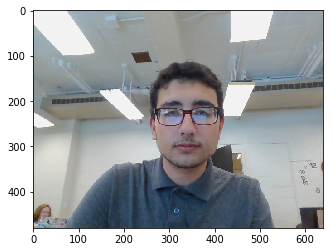

In [259]:
fig,ax = plt.subplots()
pic = take_picture()
ax.imshow(pic)

In [262]:
detections2 = list(face_detect(pic))
shape = shape_predictor(pic, detections2[0])
descriptor2 = np.array(face_rec_model.compute_face_descriptor(pic, shape))

In [263]:
distDiff(hello["Mohammad"],descriptor2)

0.1946388272616501

In [146]:
def distDiff(x, y):
    # The use of `np.newaxis` here is equivalent to our
    # use of the `reshape` function
    a = (x-y)**2
    a = np.sum(a)
    return np.sqrt(a)

Text(0.1,0.9,'matplotlib')

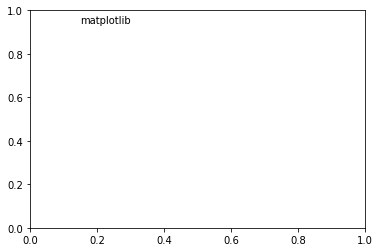

In [255]:
plt.text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)